<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_13_Matplotlib Format Charts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
from pandas.api.types import CategoricalDtype

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
trending_skills_df = df.copy()

trending_skills_df['job_posted_month'] = trending_skills_df['job_posted_date'].dt.strftime('%b')

trending_skills_df = trending_skills_df.explode('job_skills')

In [6]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
trending_skills_df['job_posted_month'] = pd.Categorical(trending_skills_df['job_posted_month'], categories=months, ordered=True)
trending_skills_df = trending_skills_df.sort_values('job_posted_month')

trending_skills_df = trending_skills_df[trending_skills_df['job_title_short'] == 'Data Scientist']

top_skills = list(trending_skills_df['job_skills'].value_counts().head(5).index)

trending_skills_df = trending_skills_df[trending_skills_df['job_skills'].isin(top_skills)]

trending_skills_df = trending_skills_df.pivot_table(index='job_posted_month', columns = 'job_skills', aggfunc='size')

C:\Users\mumbo\AppData\Local\Temp\ipykernel_5400\2810317648.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  trending_skills_df = trending_skills_df.pivot_table(index='job_posted_month', columns = 'job_skills', aggfunc='size')


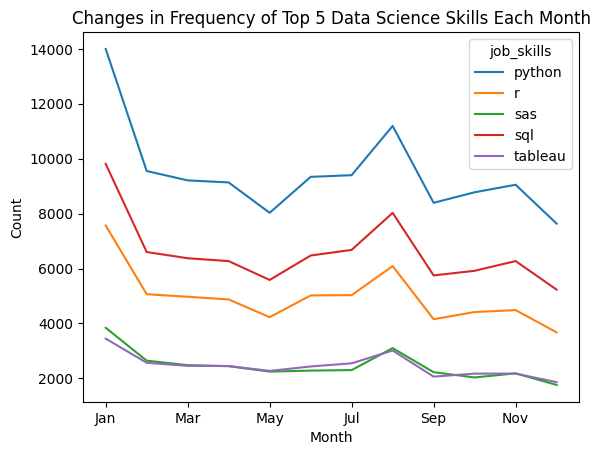

In [7]:
trending_skills_df.plot(kind='line')
plt.title('Changes in Frequency of Top 5 Data Science Skills Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()